In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df=df.set_axis(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],axis='columns')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [214]:
# Preparing X and Y Variables
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [216]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [218]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [220]:
numerical_features= [feature for feature in X.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in X.columns if df[feature].dtype=='O']

In [222]:
numerical_features,categorical_features

(['reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [223]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(
                          [
                            ("OneHotEncoder",oh_transformer,categorical_features),
                            ("StandardScaler",numeric_transformer,numerical_features)
                          ]
)

In [226]:
X=preprocessor.fit_transform(X)

In [227]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [232]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [233]:
def evaluate_model (y_true,predicted):
    mae=mean_absolute_error(y_true,predicted)
    mse=mean_squared_error(y_true,predicted)
    rmse=np.sqrt(mean_squared_error(y_true,predicted))
    r2_square=r2_score(y_true,predicted)
    return mae,mse,rmse,r2_square

In [236]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor


In [238]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [247]:
models={
      "Linear Regression":LinearRegression(),
      "Lasso":Lasso(),
      "Ridge":Ridge(),
      "Decision Tree":DecisionTreeRegressor(),
      "K Neighbors Regressor":KNeighborsRegressor(),
      "AdaBoost Regressor":AdaBoostRegressor(),
      "Random Forest Regressor":RandomForestRegressor(),
      "XGBRegressor": XGBRegressor(), 
     "CatBoosting Regressor": CatBoostRegressor(verbose=False)
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    # print(list(models.values())[i])
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {: .4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- R2 Score:  0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score:  0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- R2 Score:  0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
-

In [249]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'Decision Tree',
 'K Neighbors Regressor',
 'AdaBoost Regressor',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor']

In [251]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score'])

,Model Name,R2_Score
0,Linear Regression,0.880433
1,Lasso,0.825320
2,Ridge,0.880593
3,Decision Tree,0.732759
4,K Neighbors Regressor,0.784030
5,AdaBoost Regressor,0.854666
6,Random Forest Regressor,0.846767
7,XGBRegressor,0.827797
8,CatBoosting Regressor,0.851632


In [253]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted Data')

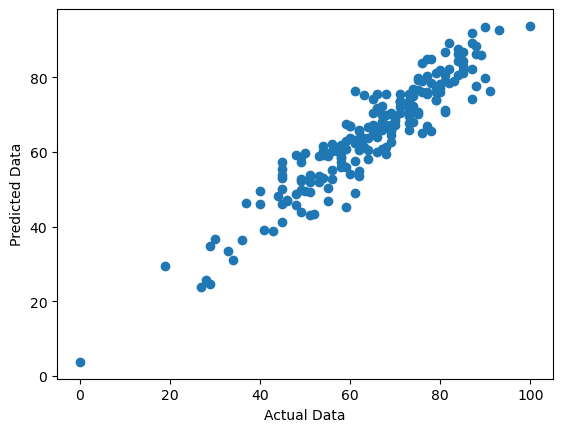

In [255]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

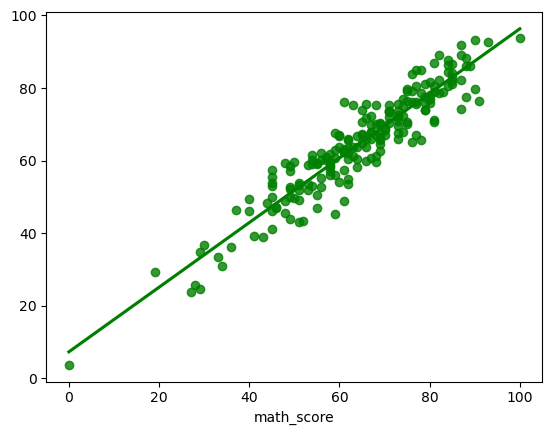

In [257]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');


In [259]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
